#  <font color=green> <center> <u>  FORMATION INGENIEUR IA  </u> - OpenClassroom </center> </font> 
---
### <font color=blue> Projet 2 - <u> Participez à un concours sur la Smart City </u>  </font>
   L'objectif de ce projet est **d'utiliser un jeux de donnés recensement des arbres de la ville de Paris** pour en faire une **analyse descriptive univarié** sur des variables aléatoires présentes dans les données. Le jeux de donnée utilisé dans le cadre de ce projet est accéssible accéssible sur [ce site](https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86844,2.30945&basemap=jawg.streets)



---

# SOMMAIRE :
---

###  <a href="#A1">Partie 1 : A la découverte des données </a>


   - <a href="#A2"> Importation des modules Python  </a>
   
   
   - <a href="#A3">Importation des données </a>
   
   
   - <a href="#A4">Caractéristiques des données </a>

### <a href="#B1">Partie 2 : Néttoyage des données</a>


   - <a href="#B2">Strategie de traitement de données </a>
   
   
   - <a href="#B3">Analyse du type de chaque paramètres</a>
   
   
   - <a href="#B4">Recherche de valeurs manquantes</a>
   
   
   - <a href="#B5">Recherche de doublons</a>
   
   
   - <a href="#B6">Recherche d'outlier</a>

 
### <a href="#C1">partie 3 : Analyse univariée</a>
   - <a href="#C2">Les Arrondissements de Paris et ses arbres </a>
   
   
   - <a href="#C3">Sur l'étude des domaines abritant les arbres </a>
   
   
   - <a href="#C6"> Critères d'outliers </a>
   
   
   - <a href="#C4">Sur l'étude de la circonference des arbres </a>
   
   
   - <a href="#C5"> Sur l'étude de la Hauteur des arbres </a>
---
---

<div class="alert alert-block alert-success">

---
#  <a name="A1"> <center> <font color=brown>  I - <u> A la découverte des données </u>   </font> </center></a> 


</div>


<div class="alert alert-block alert-info">
    
   
> ##  <a name="A2"><font color=brown> I . 1 - <u>   Importation des modules Python </u> </font></a>    
___     
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div class ="alert alert-block alert-info">


> ## <a name="A3"><font color=brown> <u>Importation des données dans un DataFrame Pandas</u> </font>
___

</div>

In [2]:
arbres_0 = pd.read_csv('les-arbres.csv' , sep = ';')
arbres = arbres_0.copy()

In [3]:
arbres.tail(3)

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
203957,168633,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE PRINCIPALE SUD / ...,A14200020006,Tilleul,Tilia,cordata,NaN,0,0,NaN,NaN,"48.763731023515184,2.371353312118119"
203958,278930,Arbre,Alignement,PARIS 13E ARRDT,NaN,NaN,AVENUE DE LA PORTE D ITALIE,000305001,Tilleul,Tilia,tomentosa,NaN,110,12,Adulte,NON,"48.817982051372816,2.360243150687402"
203959,2034818,Arbre,Jardin,PARIS 18E ARRDT,NaN,NaN,SQUARE DU 21 AVRIL 1944 / ALLEE LYDIA BECKER,000102011,Erable,Acer,campestre,''Huibers Elegant'',20,3,Jeune (arbre),NON,"48.8968111196284,2.3572328420365682"


Le simple fait de pouvoir afficher les 05 dernières lignes du fichier de donné signifie que **l'importation des donnée s'est bien passée.** 

<div class ="alert alert-block alert-info">

> ## <a name="A4"><font color=brown>I . 2 - <u>Caractéristiques des données </u> </font></a>
***

</div>

In [4]:
arbres.shape

(203960, 17)

A l'aide de **l'attribut ``shape``** on peut constater que notre jeux de donnée contient  **203960  lignes et 17 colonnes soit 203960 arbres différents et 17 paramètres** ( Variables Aléatoires ) spécifiés  pour chacun des arbres.
    
</font>
<div class="alert alert_block alert-warning">
    
    
#### <font color=red> <u>ATTENTION </u> </font> : Les données présentes sur [le site Open Data de la ville de Paris](https://opendata.paris.fr/explore/dataset/les-arbres/table/?disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&sort=espece&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLnR5cGVlbXBsYWNlbWVudCI6dHJ1ZSwiZGlzanVuY3RpdmUuYXJyb25kaXNzZW1lbnQiOnRydWUsImRpc2p1bmN0aXZlLmxpYmVsbGVmcmFuY2FpcyI6dHJ1ZSwiZGlzanVuY3RpdmUuZ2VucmUiOnRydWUsImRpc2p1bmN0aXZlLmVzcGVjZSI6dHJ1ZSwiZGlzanVuY3RpdmUudmFyaWV0ZW91Y3VsdGl2YXIiOnRydWUsImRpc2p1bmN0aXZlLnN0YWRlZGV2ZWxvcHBlbWVudCI6dHJ1ZSwiZGlzanVuY3RpdmUucmVtYXJxdWFibGUiOnRydWUsImxvY2F0aW9uIjoiMTMsNDguODY4NDQsMi4zMDk0NSIsImJhc2VtYXAiOiJqYXdnLnN0cmVldHMifX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImFyZWFzcGxpbmUiLCJmdW5jIjoiQ09OU1RBTlQiLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6InJhbmdlLWN1c3RvbSJ9XSwieEF4aXMiOiJsaWJlbGxlZnJhbmNhaXMiLCJtYXhwb2ludHMiOjEwMCwic29ydCI6IiIsInNlcmllc0JyZWFrZG93biI6InR5cGVlbXBsYWNlbWVudCIsInN0YWNrZWQiOiJub3JtYWwifV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9&location=13,48.86844,2.30945&basemap=jawg.streets) sont continuellement mise à jour et peuvent donc contenir plus de données qu'on n'en a dans notre jeux de donnée actuel. Le jeux de données utilisé ici est daté du 01 Janvier 2022 à 00 h 30min

</div>

In [5]:
np.array(arbres.columns)

array(['IDBASE', 'TYPE EMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENT ADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLE FRANCAIS', 'GENRE', 'ESPECE', 'VARIETE OUCULTIVAR',
       'CIRCONFERENCE (cm)', 'HAUTEUR (m)', 'STADE DE DEVELOPPEMENT',
       'REMARQUABLE', 'geo_point_2d'], dtype=object)

In [6]:
arbres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203960 entries, 0 to 203959
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   IDBASE                  203960 non-null  int64  
 1   TYPE EMPLACEMENT        203960 non-null  object 
 2   DOMANIALITE             203960 non-null  object 
 3   ARRONDISSEMENT          203960 non-null  object 
 4   COMPLEMENT ADRESSE      43635 non-null   object 
 5   NUMERO                  0 non-null       float64
 6   LIEU / ADRESSE          203960 non-null  object 
 7   IDEMPLACEMENT           203960 non-null  object 
 8   LIBELLE FRANCAIS        203126 non-null  object 
 9   GENRE                   203960 non-null  object 
 10  ESPECE                  201815 non-null  object 
 11  VARIETE OUCULTIVAR      38261 non-null   object 
 12  CIRCONFERENCE (cm)      203960 non-null  int64  
 13  HAUTEUR (m)             203960 non-null  int64  
 14  STADE DE DEVELOPPEME

In [7]:
arbres.describe()

,IDBASE,NUMERO,CIRCONFERENCE (cm),HAUTEUR (m)
count,2.039600e+05,0.0,203960.000000,203960.000000
mean,4.613575e+05,NaN,81.062532,8.770249
std,6.321338e+05,NaN,62.903450,5.976547
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.589518e+05,NaN,32.000000,5.000000
50%,2.268225e+05,NaN,70.000000,8.000000
75%,2.815182e+05,NaN,115.000000,12.000000
max,2.035724e+06,NaN,1208.000000,180.000000


<div class ="alert alert-block alert-success">

---
# <a name="B1"><center> <font color=brown>  II - <u> Néttoyage des données </u> </font> </center></a>
---
    
</div>

<div class ="alert alert-block alert-info">

> ## <a name="B2"><font color=brown> II . 1 - <u> Strategie de traitement de données </u> </font></a>

</div>

Avant de pouvoir continuer il est important de **faire quelques petites remarques** afin d'**illustrer ma strategie de traitement** de données. Ma remarque vient simplement  de l'observation des lignes numéro 33 et 203931 des données :

In [8]:
arbres.iloc[[33,203931],:]

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
33,114802,Arbre,Jardin,PARIS 11E ARRDT,NaN,NaN,JARDIN DE LA FOLIE TITON,00000045,Erable,Acer,rufinerve,NaN,0,4,NaN,NaN,"48.852396894698025,2.385380341951511"
203931,128786,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,JARDIN DE L''ATLANTIQUE,00000179,Pin,Pinus,pinea,NaN,95,0,NaN,NaN,"48.83934802982247,2.318852011505807"


Sur la **ligne 33** on peut voire que **l'arbre possède une circonférence de 0 Cm**  et que **la variété de l'arbre n'est pas indiquée** non plus. A la **ligne 203931** on constate **une hauteur de 0 mètre** 

On pourrait être tenté de se dire qu'il suffit simplement de supprimer ces  lignes de nos données mais c'est sans oublier que les même lignes indiquent respectivement que :
- il s'agit d'un arbre de l'espèce ``rufinerve`` genre ``Acer`` libelle ``Erable`` en langue française, est ``planté dans un jardin`` de l'``arrondissement de Paris 11 ième`` et ````mesure 4 mètres de haut``
- il s'agit d'un arbre de l'espèce ``pinea	`` genre ``Pinus`` libelle ``Pin`` en langue française, est ``planté dans un jardin`` de l'``arrondissement de Paris 15 ième`` et possède ``une circonférence de 95 Cm``

Ainsi **ces informations sur les autres variables sont tout à fait pertinantes et acceptables pour une analyse et ne devraient pas être perdues** d'autant plus qu'**elles pourraient représenter une très grande proportion de lignes manquantes** comme on peut le voire avec les commandes ci-dessous où elles comptent pour au moins 10 % de données importantes non exploitées pour l'analyse statistique :

In [9]:
(arbres[["CIRCONFERENCE (cm)", "HAUTEUR (m)"]] == 0).mean()*100

CIRCONFERENCE (cm)    10.110316
HAUTEUR (m)           13.058933
dtype: float64

On conclu donc que le fait de **supprimer des lignes du fait d'un manque de donnée sur une variable peu modifier la statistique des autres variables qui sont quant à elles très bien renseignées sur ces lignes là.**

D'un autre côté, dans le cadre de ce projet il est simplement question de **faire une analyse univariée** des données. Ce qui signifie que **je peut traiter chaque variable indépendement des autres**. En particulier **si sur une ligne l'information sur une variable est manquante je peux tout de même utiliser les autres informations de la même ligne pour la statistique des autres variables**

Au final tout ceci me pousse à **ma stratégie qui consistera à considérer chaque colonne indépendement et de ne traiter les valeurs problématiques que selon chaque colonne et pas selon les lignes.**

<div class ="alert alert-block alert-info">

> ## <a name="B3"><font color=brown> II . 2 - <u> Analyse du type de chaque paramètres </u> </font></a>
___

</div>

In [10]:
arbres.dtypes

IDBASE                      int64
TYPE EMPLACEMENT           object
DOMANIALITE                object
ARRONDISSEMENT             object
COMPLEMENT ADRESSE         object
NUMERO                    float64
LIEU / ADRESSE             object
IDEMPLACEMENT              object
LIBELLE FRANCAIS           object
GENRE                      object
ESPECE                     object
VARIETE OUCULTIVAR         object
CIRCONFERENCE (cm)          int64
HAUTEUR (m)                 int64
STADE DE DEVELOPPEMENT     object
REMARQUABLE                object
geo_point_2d               object
dtype: object

### <font color=blue> Aucun problème de type observé : </font>
On pourrait **s'attendre à ce que la hauteur des arbres soit une grandeur physique réelle donnée en mètres** et pourtant dans ce jeux de données elle est *spécifiée à valeur entier* car toutes les valeurs ne sont données qu'au mètre près, autrement dit les **valeurs observées ne sont pas à virgule flottantes.** On peut se convaincre que ce ne sont que des multiples entiers du mètre en regardant ces valeurs sur [le site Open Data de la Ville de Paris](https://opendata.paris.fr/explore/dataset/les-arbres/table/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86844,2.30945&basemap=jawg.streets)

<div class ="alert alert-block alert-info">

> ## <a name="B4"><font color=brown>  II . 3 - <u> Recherche de valeurs manquantes </u> </font></a>

</div>

******
***Pour déterminer le nombre de valeurs manquantes dans chaque colonne :***
- On utilise la fonction ``ìsnull()`` ou ``isna()`` sur notre DataFrame qui, pour chaque élément, renvoi `True` ou `False` selon que la valeur est manquante ou non
- puis le résultat est transmis à la fonction `sum()` qui par defaut va se charger de compter toutes les valeurs manquantes  sur chaque colonne et donc pour chaque paramètres
******

In [11]:
arbres.isnull().sum()  # arbres.isna.sum() marche aussi 

IDBASE                         0
TYPE EMPLACEMENT               0
DOMANIALITE                    0
ARRONDISSEMENT                 0
COMPLEMENT ADRESSE        160325
NUMERO                    203960
LIEU / ADRESSE                 0
IDEMPLACEMENT                  0
LIBELLE FRANCAIS             834
GENRE                          0
ESPECE                      2145
VARIETE OUCULTIVAR        165699
CIRCONFERENCE (cm)             0
HAUTEUR (m)                    0
STADE DE DEVELOPPEMENT     48785
REMARQUABLE                27967
geo_point_2d                   0
dtype: int64

Il est plus pratique d'uliser la **méthode ``mean()``** permettant d'avoir les **proportions des valeurs manquantes** pour chaque paramètres
___

In [12]:
arbres.isna().mean()*100

IDBASE                      0.000000
TYPE EMPLACEMENT            0.000000
DOMANIALITE                 0.000000
ARRONDISSEMENT              0.000000
COMPLEMENT ADRESSE         78.606099
NUMERO                    100.000000
LIEU / ADRESSE              0.000000
IDEMPLACEMENT               0.000000
LIBELLE FRANCAIS            0.408904
GENRE                       0.000000
ESPECE                      1.051677
VARIETE OUCULTIVAR         81.240930
CIRCONFERENCE (cm)          0.000000
HAUTEUR (m)                 0.000000
STADE DE DEVELOPPEMENT     23.918906
REMARQUABLE                13.712002
geo_point_2d                0.000000
dtype: float64

Ainsi Les colonnes :

- ``COMPLEMENT ADRESSE``
- ``NUMERO``
- ``VARIETE OUCULTIVAR``

sont constituées en grande majorité par des valeurs manquantes. je fais le choix de **m'en débarasser en utilisant la méthose ``drop()`` de la ``librairie Pandas``.** Je vais aussi me séparer des paramètres non nécessaires :

- ``REMARQUABLE``
- ``IDEMPLACEMENT``
- ``LIEU / ADRESSE``

In [13]:
arbres=arbres.drop(['COMPLEMENT ADRESSE','NUMERO','VARIETE OUCULTIVAR','REMARQUABLE','IDEMPLACEMENT','LIEU / ADRESSE','TYPE EMPLACEMENT'],axis=1)
arbres.isna().mean()*100

IDBASE                     0.000000
DOMANIALITE                0.000000
ARRONDISSEMENT             0.000000
LIBELLE FRANCAIS           0.408904
GENRE                      0.000000
ESPECE                     1.051677
CIRCONFERENCE (cm)         0.000000
HAUTEUR (m)                0.000000
STADE DE DEVELOPPEMENT    23.918906
geo_point_2d               0.000000
dtype: float64

En ce qui concerne les autres variables/colonnes ayant des valeurs manquantes, lorsqu'il faudra en faire la statistique je pourrais extraires les données de la colonne en question tout en prenant le soin d'élliminer les données manquantes.

<div class ="alert alert-block alert-info">

> ## <a name="B5"><font color=brown> II . 4 -  <u> Recherche de doublons </u> </font></a>

</div>

La recherche de doublon dans un jeux de données s'éffectue **à l'aide de la methode ``duplicated()``** qui va retourner des **valeurs booléennes ``True`` ou ``False``.** A l'appel de la methode ``duplicated()`` il faut préciser une colonne qui servira de reférence pour la recherche de doublon.

Dans le cas actuel **c'est la colonne ``IDBASE`` qui semble le meilleure candidate pour servir de reférence** et correspondant à un identifiant unique pour chaque arbre renseigné dans nos données

In [14]:
print(f"Nombre de doublons dans les données: {arbres.duplicated('IDBASE' , keep=False).sum()}")

Nombre de doublons dans les données: 0


<font color=blue>**Aucun doublon n'est donc retrouvé dans nos données.** </font>

Dans le doute **on pourrait tout de même se demander si la colonne ``geo_point_2d`` ne pourrait pas plutôt servir de colonne de reférence.** Une analyse plus poussée des doublons dans ce cas précis montre cependant que **ce n'est pas le cas,** nous confortant ainsi dans l'idée qu'**il n'y ait aucun doublon dans notre jeux de données.**

In [15]:
arbres.duplicated('geo_point_2d' , keep=False).sum()

18

In [16]:
 arbres[arbres.duplicated('geo_point_2d' , keep=False)].sort_values('geo_point_2d')

,IDBASE,DOMANIALITE,ARRONDISSEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,geo_point_2d
12506,2011523,Jardin,BOIS DE VINCENNES,Peuplier,Populus,nigra,100,22,Adulte,"48.83641631842574,2.446277271311284"
81262,2011522,Jardin,BOIS DE VINCENNES,Peuplier,Populus,nigra,0,0,NaN,"48.83641631842574,2.446277271311284"
94202,2016369,Jardin,BOIS DE VINCENNES,Pommier à fleurs,Malus,trilobata,0,0,NaN,"48.83686161921065,2.446518468159797"
158125,2010634,Jardin,BOIS DE VINCENNES,Hêtre,Fagus,sylvatica,75,8,Jeune (arbre)Adulte,"48.83686161921065,2.446518468159797"
155417,2010732,Jardin,BOIS DE VINCENNES,Cèdre,Cedrus,libani subsp. atlantica,110,18,Adulte,"48.83853874307851,2.439349992164275"
152926,2016379,Jardin,BOIS DE VINCENNES,Cèdre,Cedrus,libani subsp. atlantica,0,0,NaN,"48.83853874307851,2.439349992164275"
42562,2010731,Jardin,BOIS DE VINCENNES,Cèdre,Cedrus,libani subsp. atlantica,160,20,Adulte,"48.8385499224699,2.439267566446114"
96975,2016378,Jardin,BOIS DE VINCENNES,Cèdre,Cedrus,libani subsp. atlantica,0,0,NaN,"48.8385499224699,2.439267566446114"
25264,2010609,Jardin,BOIS DE VINCENNES,Platane,Platanus,x hispanica,190,24,Adulte,"48.83911783238497,2.438809500729797"
129353,2010572,Jardin,BOIS DE VINCENNES,Platane,Platanus,x hispanica,195,18,Adulte,"48.83911783238497,2.438809500729797"


<div class ="alert alert-block alert-info">

> ## <a name="B6"><font color=brown> II . 5 -  <u> Recherche d'outlier </u> </font></a>

</div>

Bien qu'il existe un outil puissant comme **le diagramme à moustache**, en general on peut effectuer une **recherche simplifiée d'outlier faisant appel à la méthode ``describe()``**

In [17]:
arbres.describe()

,IDBASE,CIRCONFERENCE (cm),HAUTEUR (m)
count,2.039600e+05,203960.000000,203960.000000
mean,4.613575e+05,81.062532,8.770249
std,6.321338e+05,62.903450,5.976547
min,9.987400e+04,0.000000,0.000000
25%,1.589518e+05,32.000000,5.000000
50%,2.268225e+05,70.000000,8.000000
75%,2.815182e+05,115.000000,12.000000
max,2.035724e+06,1208.000000,180.000000


La methode ``describe()`` nous donnent les valeurs extrêmes (max et min ) prises par chacune des variables quantitatives. On remarque ici que **pour la circonference et la hauteur des arbres on a un minimum qui est de 0 Cm et 0 m**; ce qui n'est pas logique puisqu'**un arbre devrait avoir une circonférence et une hauteur de valeur finie non nulle.**

Conformement à ma strategie de traitement des données **je pourrais me débarasser de ces valeurs nulles au moment de faire la statistique de ces deux variables.** j'utiliserais aussi la boite à moustache pour détecter d'autre **outliers qui pourraient se retrouver dans les données.**

<div class="alert alert-block alert-success">

> ## <a name="C1"><center> <font color=brown>  III - <u> ANALYSE UNIVARIEE : Statistique des variables </u> </font> </center></a> 

</div>

**Notre jeux de donnée portant sur les arbres de la ville de Paris permet de mettre en évidence deux catégories de paramètres à savoir :**


- Les paramètres qui donent une information qualitative sur les arbres de la ville : `ARRONDISSEMENT`, `STADE DE DEVELOPPEMENT`, `GENRE`,`ESPECE` ...etc
- Les paramètres qui donnent des informations quantitatives sur les abres à savoir : `CIRCONFERENCE (cm)`,`HAUTEUR (m)` et `geo_point_2d`



In [18]:
arbres.dtypes

IDBASE                     int64
DOMANIALITE               object
ARRONDISSEMENT            object
LIBELLE FRANCAIS          object
GENRE                     object
ESPECE                    object
CIRCONFERENCE (cm)         int64
HAUTEUR (m)                int64
STADE DE DEVELOPPEMENT    object
geo_point_2d              object
dtype: object

Dans les lignes qui vont suivre **nous allons tenter d'extraire quelques informations importantes sur les arbres de la ville** de Paris au travers d'**une analyse statistique qui portera dans un premier temps sur les variables qualitatives du problème et terminer ensuite par une description quantitave** de nos arbres



<div class="alert alert-block alert-info">

> ## <a name="C2"><font color=brown> III . 1 - <u> Les Arrondissements de Paris et ses arbres </u> </font></a> 

</div>

Dans un premier temps **je vais utiliser la méthode** ``unique()`` pour avoir les différentess modalités ou réalisation de la variable ``ÀRRONDISSEMENT``

In [19]:
modalite_arrondissement = arbres['ARRONDISSEMENT'].unique()

In [20]:
modalite_arrondissement

array(['PARIS 17E ARRDT', 'BOIS DE BOULOGNE', 'BOIS DE VINCENNES',
       'PARIS 20E ARRDT', 'PARIS 15E ARRDT', 'PARIS 19E ARRDT',
       'PARIS 8E ARRDT', 'PARIS 16E ARRDT', 'PARIS 12E ARRDT',
       'PARIS 14E ARRDT', 'PARIS 11E ARRDT', 'VAL-DE-MARNE',
       'PARIS 18E ARRDT', 'PARIS 13E ARRDT', 'PARIS 10E ARRDT',
       'PARIS 7E ARRDT', 'PARIS 6E ARRDT', 'HAUTS-DE-SEINE',
       'PARIS 4E ARRDT', 'SEINE-SAINT-DENIS', 'PARIS 3E ARRDT',
       'PARIS 5E ARRDT', 'PARIS 1ER ARRDT', 'PARIS 9E ARRDT',
       'PARIS 2E ARRDT'], dtype=object)

On peut aussi compter le nombre de modalité à l'aide de  la méthdode ``len()``

In [21]:
len(modalite_arrondissement)

25

Comme on peut le voire, **la colonne ``ARRONDISSEMENT`` compte 25 modalités qui seront considérés ici comme les arrondissements de la ville de Paris** même si nous savons qu'**en réalité la ville de Paris ne compte exactement que** [20 Arrondissements](https://planparis360.fr/plan-arrondissement-paris)

Les 5 autres modalités à  savoir :
- ``BOIS DE BOULOGNE``
- ``BOIS DE VINCENNES``
- ``VAL-DE-MARNE``
- ``HAUTS-DE-SEINE``
- ``SEINE-SAINT-DENIS``

ont certainement été ajoutées aux données en tant qu'arrondissements de la ville de Paris pour des raison liées au dénombrement des arbres compris dans ces zomes et qui se distinguent très nettement des 20 arrondissements de la ville de Paris.

**Ainsi les 203960 arbres qui constituent nos données sont reparties sur ces 25 'Pseudo-arrondissements'** ; éssayons donc à présent d'étudier cette repartitions.

___
on a vu qu'il s'agit d'une variable qualitative de 25 réalisations. A l'aide de l'Objet ``DataFrame()`` de la librairie ``pandas`` **je vais construire un tableau des effectifs et frequences des arbres** en fonction des arrondissements. 

In [22]:
tab_arrondissement=pd.DataFrame( index=modalite_arrondissement) # DataFrame vide
tab_arrondissement["Effectif"]=arbres['ARRONDISSEMENT'].value_counts()[modalite_arrondissement] # Nbr d'arbre/Arrondissement
tab_arrondissement['Frequence'] = tab_arrondissement['Effectif']/len(arbres) # Frequences
tab_arrondissement

,Effectif,Frequence
PARIS 17E ARRDT,10869,0.053290
BOIS DE BOULOGNE,4124,0.020220
BOIS DE VINCENNES,11812,0.057913
PARIS 20E ARRDT,15654,0.076750
PARIS 15E ARRDT,17243,0.084541
PARIS 19E ARRDT,14568,0.071426
PARIS 8E ARRDT,7155,0.035080
PARIS 16E ARRDT,16914,0.082928
PARIS 12E ARRDT,12405,0.060821
PARIS 14E ARRDT,11592,0.056835


In [23]:
print(f"1 - Minimum : {tab_arrondissement['Effectif'].min()}")
print(f"2 - Maximum : {tab_arrondissement['Effectif'].max()}")
print(f"3 - Moyenne : {tab_arrondissement['Effectif'].mean()}")
print(f"4 - Mode : {  (tab_arrondissement[tab_arrondissement['Effectif']== tab_arrondissement['Effectif'].max()].index)[0]  }")

1 - Minimum : 529
2 - Maximum : 17243
3 - Moyenne : 8158.4
4 - Mode : PARIS 15E ARRDT


Si on devait ainsi ordonner nos 25 Arrondissements dans l'ordre croissant du nombre d'arbre qui y sont plantés, **le plus petit des arrondissements possèderait 529 arbres** et **le plus grand en aurait 17 243** pour **une moyenne arbre par arrondisseemnt de 8 158 arbre.**

L'arrondissement ayant le plus grand nombre d'arbres est `paris 15 ième Arrondissement` avec ses 17 243 arbres

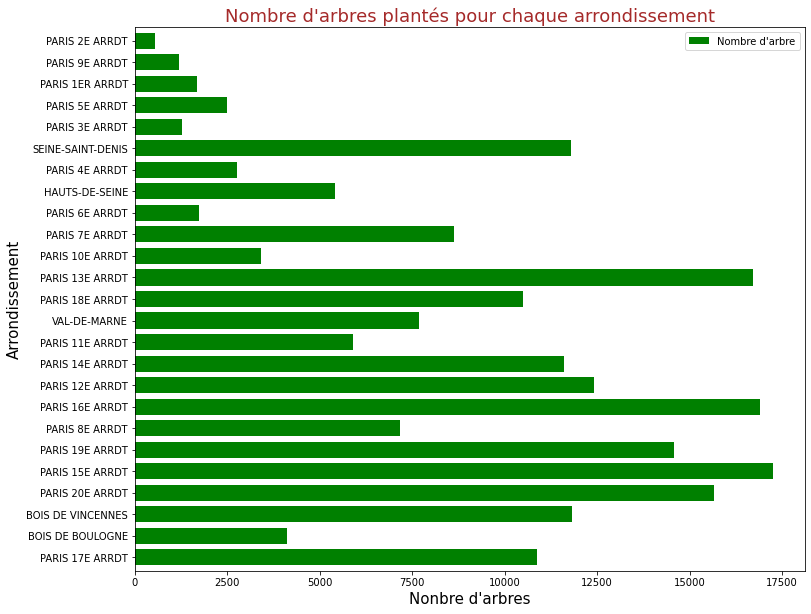

In [24]:
plt.figure(figsize=(12,10))
tab_arrondissement['Effectif'].plot(kind='barh',label="Nombre d'arbre",color='green',width=0.75)
plt.title("Nombre d'arbres plantés pour chaque arrondissement", color ='brown' , size = 18)
plt.ylabel('Arrondissement' , size = 15)
plt.xlabel("Nonbre d'arbres", size = 15)
plt.legend(loc='best')
plt.show()

En observant la répartition des arbres par arrondissement **je me suis posé la question de savoir pourquoi autant de disparité dans la répartition de ces arbres ?**  Pourquoi devrait-on avoir des arrondissement hautement peuplé en arbres ( jusqu'à 17 000 arbres ) et d'un autre côté des arrondssements très faiblement peuplé en arbres ( juste 500 arbres )

après reflexion **je me suis dit que la superficie des arrondissements devait avoir quelque chose à y voire.** J'ai donc recherché sur internet la superficie (en hectare ) des différents arrondissements présents dans nos donnée et regroupés dans une variable nommée ``arrond_super``

In [25]:
# Les superficies sont données en Hectare ( ha)
arrond_super = {'BOIS DE BOULOGNE': 846 ,
'BOIS DE VINCENNES': 995,
'HAUTS-DE-SEINE'  :  17600,
'PARIS 10E ARRDT' : 289 ,
'PARIS 11E ARRDT' : 367 ,
'PARIS 12E ARRDT' : 637 ,
'PARIS 13E ARRDT' : 715 ,
'PARIS 14E ARRDT' : 564 ,
'PARIS 15E ARRDT' : 848 ,
'PARIS 16E ARRDT' : 791 ,
'PARIS 17E ARRDT' : 567 ,
'PARIS 18E ARRDT' : 601 ,
'PARIS 19E ARRDT' : 679 ,
'PARIS 1ER ARRDT' : 183 ,
'PARIS 20E ARRDT' : 598 ,
'PARIS 2E ARRDT'  : 99  ,
'PARIS 3E ARRDT'  : 117 ,
'PARIS 4E ARRDT'  : 160 ,
'PARIS 5E ARRDT'  : 254 ,
'PARIS 6E ARRDT'  : 215 ,
'PARIS 7E ARRDT'  : 409 ,
'PARIS 8E ARRDT'  : 388 ,
'PARIS 9E ARRDT'  : 218 , 
'SEINE-SAINT-DENIS' : 23600 ,
'VAL-DE-MARNE'   : 24500  }

In [26]:
tab_arrondissement['Superficie (ha)'] =0
for i,j in arrond_super.items() :  tab_arrondissement.loc[i,'Superficie (ha)'] = j
tab_arrondissement

,Effectif,Frequence,Superficie (ha)
PARIS 17E ARRDT,10869,0.053290,567
BOIS DE BOULOGNE,4124,0.020220,846
BOIS DE VINCENNES,11812,0.057913,995
PARIS 20E ARRDT,15654,0.076750,598
PARIS 15E ARRDT,17243,0.084541,848
PARIS 19E ARRDT,14568,0.071426,679
PARIS 8E ARRDT,7155,0.035080,388
PARIS 16E ARRDT,16914,0.082928,791
PARIS 12E ARRDT,12405,0.060821,637
PARIS 14E ARRDT,11592,0.056835,564


En calculant **la correlation entre le nombre d'arbres et la superficie** de chaque arrondissement on obtient :

In [27]:
np.corrcoef( tab_arrondissement['Effectif'] , tab_arrondissement['Superficie (ha)'] )[1,0]

0.054114229274674575

Valeur extrêmement faible qui semble indiquer qu'il n'y aurait aucune correlation entre ces données. Cependant si j'exclu de mes calculs les 5 modalités qui ne font pas partie des 20 arrondissements de la ville de Paris on obtient un résultat différent qui semble quand à lui indiquer une très forte correlation. 

In [28]:
not_arrondissement = ['SEINE-SAINT-DENIS','HAUTS-DE-SEINE','BOIS DE BOULOGNE','BOIS DE VINCENNES','VAL-DE-MARNE']
N , S = [] , []
for i in tab_arrondissement.index :  
    if i not in not_arrondissement : 
        N.append(tab_arrondissement.loc[i,'Effectif'])
        S.append(tab_arrondissement.loc[i,'Superficie (ha)'])
print(f"Le coefficient de correlation entre le nombre d'arbre et la superficie des arrondissements de {np.corrcoef( N , S )[0,1]}")

Le coefficient de correlation entre le nombre d'arbre et la superficie des arrondissements de 0.9773120378324448


En représantant la frequence des effectifs d'arbres et de la superficie pour chaque arrondissement on obtient :

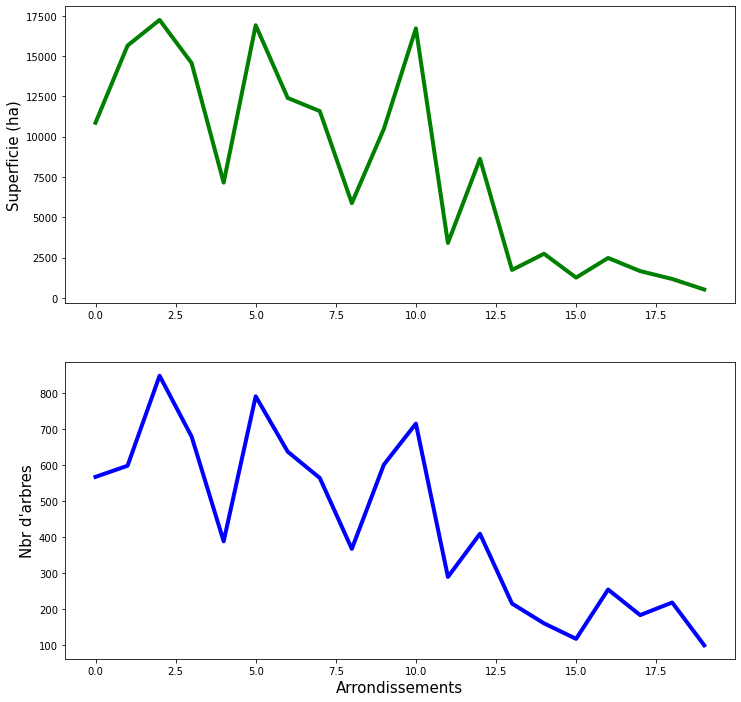

In [29]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.plot( range(len(N)) , N, color = 'green',lw=4)
plt.ylabel('Superficie (ha)' , size =15,)
plt.subplot(2,1,2)
plt.plot( range(len(S)) , S, color = 'blue',lw=4)
plt.xlabel('Arrondissements', size =15)
plt.ylabel("Nbr d'arbres" , size =15)
plt.show()

<div class="alert alert-block alert-info">

> ## <a name="C3"><font color=brown> III . 2 - <u> SUR L'ETUDE DES DOMAINES ABRITANT LES ARBRES </u> </font></a>

</div>

Il s'agira ici d'étudier la variable ``DOMANIALITE`` qui renseigne sur les différents lieux où on peut retrouver les arbres listés dans nos données.

Plus haut nous avons vu qu'il n'y avait aucune valeur manquante sur la variable ``DOMANIALITE``

In [30]:
print(f"Pourcentage de valeurs manquantes : {arbres['DOMANIALITE'].isna().sum()*100} %")

Pourcentage de valeurs manquantes : 0 %


**Les différents domaines ou lieu dans lesquels ont retrouve les arbres de Paris** sont les suivant :

In [31]:
modalite_emplacement = arbres['DOMANIALITE'].unique()
modalite_emplacement

array(['Alignement', 'CIMETIERE', 'Jardin', 'PERIPHERIQUE', 'DJS',
       'DASCO', 'DFPE', 'DASES', 'DAC'], dtype=object)

In [32]:
len(modalite_emplacement)

9

Nous avons donc 9 types d'emplacement différents pour les arbres.


In [33]:
tab_emplacement = pd.DataFrame(index=modalite_emplacement)
tab_emplacement['Effectif'] = arbres['DOMANIALITE'].value_counts()[modalite_emplacement]
tab_emplacement['Frequence'] = tab_emplacement['Effectif']/tab_emplacement['Effectif'].sum()
tab_emplacement

,Effectif,Frequence
Alignement,105670,0.518092
CIMETIERE,32003,0.156908
Jardin,47991,0.235296
PERIPHERIQUE,5289,0.025932
DJS,4509,0.022107
DASCO,7087,0.034747
DFPE,1369,0.006712
DASES,13,0.000064
DAC,29,0.000142


Ainsi les arbres de la ville de paris sont **en mojorité utilisés pour les alignements** avec un peu plus de  **la moitié des effectifs des arbres spécialement assignés pour les alignements** le long des routes et des rues pour les orner et les ombrager.  on y trouve en effet environ :
- **2 fois plus** d'arbres qu'on en trouve **dans les jardins**
- **3 fois plus** que dans les **cimétières.**

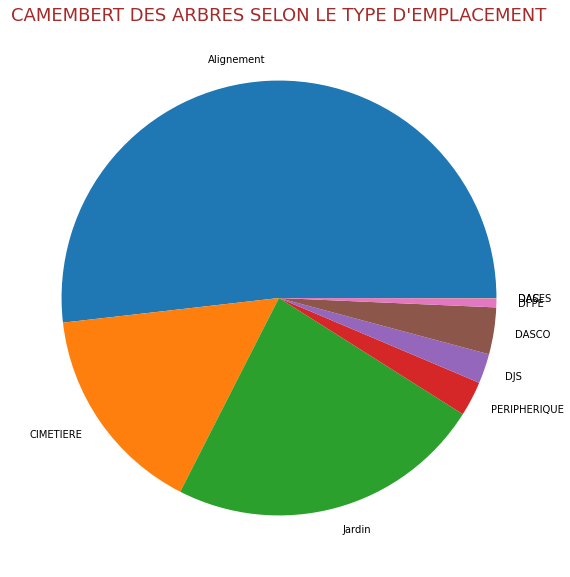

In [34]:
plt.figure(figsize=(15,10))
tab_emplacement['Effectif'].plot(kind='pie' ,label='')
plt.title("CAMEMBERT DES ARBRES SELON LE TYPE D'EMPLACEMENT", color ='brown' , size = 18)
plt.show()

On pourrait se poser la questiion de savoir si dans chaque arrondissement de la ville les arbres se retrouve toujours le plus souvent dans les espaces d'alignement ou pas.

In [35]:
domaine = pd.DataFrame(index = modalite_arrondissement)
for i in domaine.index :
    a = arbres.loc[arbres['ARRONDISSEMENT']==i,'DOMANIALITE'].value_counts(normalize=True)
    domaine.loc[i , 'domaine_mode' ] = a[a == a.max()].index
    domaine.loc[i , 'proportions (%)' ] = round(a.max()*100,1)
domaine

,domaine_mode,proportions (%)
PARIS 17E ARRDT,[Alignement],55.6
BOIS DE BOULOGNE,"Index(['Alignement'], dtype='object')",98.9
BOIS DE VINCENNES,"Index(['Jardin'], dtype='object')",52.9
PARIS 20E ARRDT,"Index(['Alignement'], dtype='object')",34.9
PARIS 15E ARRDT,"Index(['Alignement'], dtype='object')",49.0
PARIS 19E ARRDT,"Index(['Alignement'], dtype='object')",53.5
PARIS 8E ARRDT,"Index(['Alignement'], dtype='object')",82.2
PARIS 16E ARRDT,"Index(['Alignement'], dtype='object')",62.3
PARIS 12E ARRDT,"Index(['Alignement'], dtype='object')",61.8
PARIS 14E ARRDT,"Index(['Alignement'], dtype='object')",59.9


On constate alors que **dans tous les arrondissements ( à quelques exceptions près ) on retrouve un maximum d'arbres sur les zones d'alignement**

<div class="alert alert-block alert-info">

> ## <a name="C6"><font color=brown> III . 3 - <u> Critères d'outliers </u> </font></a>

</div>

Il est possible de definire plusieurs critères qui permettent de mettre en évidence des outliers dans les données. J'en ai definis 3 pour l'analyse quantitative à savoir :
 - **Densité des données :** cette méthode utilise la **boite de moustache.** En effet selon la densité des points sur l'axe de la variable étudiée, il est possible de repérer visuellement des points qui sont éloignés du reste des données.
 
 
 - **multiple de la distance interquanile :** les outliers sont ici definis par un multiple de la distance interquantile au delà du troisième quantile.
 
 
 - **Stabilités des indicateurs statistiques :** en definissant un seuil de coupure des données sur la variable étudiée, il est possible de définir plusieurs sous-échantillons imbriqués les uns dans les autres. La représentation graphique des différents indicateurs statistiques permet d'obser un seuil à partir duquel ces derniers changent très peu à mesure qu'on augmente la taille des données

<div class="alert alert-block alert-info">

> ## <a name="C4"><font color=brown> III . 4 - <u> SUR L'ETUDE DE LA CIRCONFERENCE DES ARBRES </u> </font></a>

</div>

Dans la partie relative au néttoyage des données nous avons vu que la variable ``CIRCONFERENCE (cm)`` possède plusieurs valeurs manquantes ou abérantes nulles qu'on dénombre à hauteur de 10 % des données.

In [36]:
round((arbres["CIRCONFERENCE (cm)"] <= 0).mean()*100 , 2)

10.11

**L'analyse qui suivra donc sur la circonference des arbres ne concernera que 90 % des arbres de la ville** puisque 10 % sont à élliminer pour cause d'une circonference nulle, ce qui n'est pas cohérent avec la réalité commune.

In [37]:
tab_circonference = pd.DataFrame(index = arbres[ arbres['CIRCONFERENCE (cm)'] !=0 ].index)
tab_circonference['CIRCONFERENCE (cm)'] = arbres.loc[tab_circonference.index,'CIRCONFERENCE (cm)' ]
tab_circonference.describe()

,CIRCONFERENCE (cm)
count,183339.000000
mean,90.180016
std,59.830360
min,1.000000
25%,45.000000
50%,80.000000
75%,120.000000
max,1208.000000


la circonference **la plus petite est de 1 Cm et la plus grande de 1208 Cm** ( possible outlier )

Ainsi **on dispose de 183 339 grandeurs entières comprises **entre 1 et 1208.** on imagine bien que chacune de ces modalités est présente au moins une fois dans les données. On peut donc considérer la varialbe ``CIRCONFERENCE (cm)`` comme une variable quantitative continue que l'on peut ainsi représenter avec un histogramme

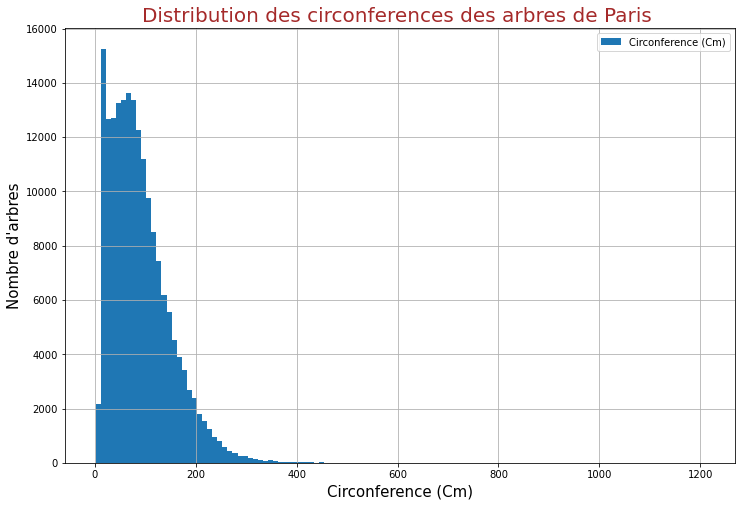

In [38]:
plt.figure(figsize=(12,8))
tab_circonference['CIRCONFERENCE (cm)' ].hist(density =False , bins = 120, label='Circonference (Cm)')
plt.title("Distribution des circonferences des arbres de Paris ", color ='brown' , size = 20)
plt.xlabel('Circonference (Cm)' ,size =15)
plt.ylabel("Nombre d'arbres",size =15)
plt.legend(loc='best' )
plt.show()

**La circonférence moyenne des arbres** est de : 

In [39]:
print(f"- Mode : {tab_circonference['CIRCONFERENCE (cm)'].mode()[0]} Cm")
print(f"- Moyenne : {int(tab_circonference['CIRCONFERENCE (cm)'].mean())} Cm")
print(f"- Ecart-type : {int(tab_circonference['CIRCONFERENCE (cm)'].std())} Cm")
print(f"- Médiane : {tab_circonference['CIRCONFERENCE (cm)'].median()} Cm")
print(f"- Premier quantile ( Q1 ) : {tab_circonference['CIRCONFERENCE (cm)'].quantile(q=0.25)} Cm")
print(f"- Deuxième quantile ( Q3 ) : {tab_circonference['CIRCONFERENCE (cm)'].quantile(q=0.75)} Cm")
print(f"- Ecart inter-quantile ( IQR ) : {tab_circonference['CIRCONFERENCE (cm)'].quantile(q=0.75)-tab_circonference['CIRCONFERENCE (cm)'].quantile(q=0.25)} Cm")


- Mode : 20 Cm
- Moyenne : 90 Cm
- Ecart-type : 59 Cm
- Médiane : 80.0 Cm
- Premier quantile ( Q1 ) : 45.0 Cm
- Deuxième quantile ( Q3 ) : 120.0 Cm
- Ecart inter-quantile ( IQR ) : 75.0 Cm


Ainsi donc **la moitié des arbres de Paris a une circonference inférieure à 80 Cm** tandis que **l'autre moitié a une circonférence au moins égale à 80 Cm.**

D'un autre côté dans la ville de Paris **on rencontre plus souvent des abres ayant une circonférence d'environ 20 Cm** et  la **circonférence moyenne de ces même arbres est de 90 Cm** avec un **écart standard autour de cette moyenne d'environ 59 Cm.** 

Cependant lorsqu'on observe la courbe de l'histogramme précédant **on constate que les arbres ayant une circonférence au moins égale à 400 Cm sont beacoup moins répendus dans la ville** et pour certaines valeurs on n'en retrouve qu'un seul exemplaire dans la ville. Parmi ces valeurs il pourrait s'y trouver des outlier qui ont un gros impacts sur les mesures de tendance centrales.

**Pour mettre à jour ces outliers je vais de ce pas utiliser la boite à moustache.**

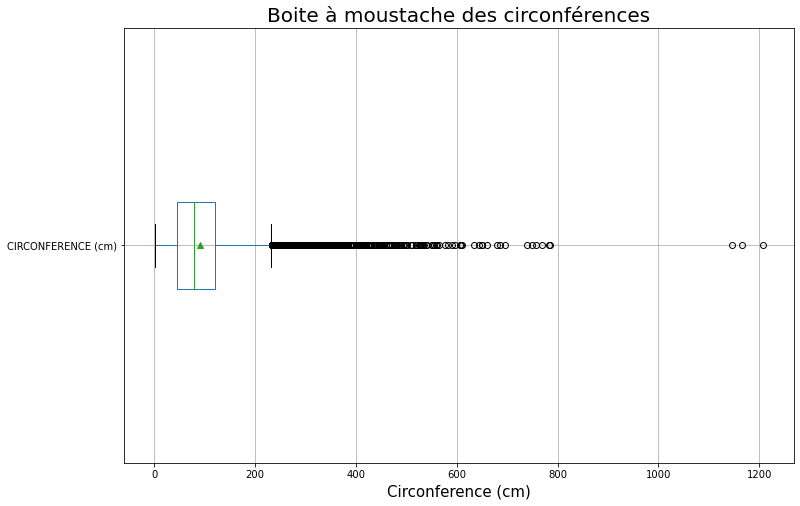

In [40]:
plt.figure(figsize=(12,8))
tab_circonference.boxplot( column='CIRCONFERENCE (cm)', vert =False, showmeans =True,whis=1.5,widths =0.2)
plt.xlabel('Circonference (cm)', size =15)
plt.ylabel('')
plt.title('Boite à moustache des circonférences' , size=20)
plt.show()

Comme on pouvait bien s'y attendre d'après les observations faites sur l'histogramme, **la grande majorité des arbres possède une circonférence inférieure à 233 Cm**; ce sui représente **97.52% des arbres de la ville.** Le reste des arbres ( soit 2.48 % ) de circonférence suppérieure à 233 Cm serait à priori considéré comme outlier. J'en ai un peu des doutes et avant de décider de les supprimer je veux bien faire une analyse un peu plus poussée.

Essayons pour celà de ressortir la répartition de ces arbres ( suppoosés outliers ) par arrondissement, nombre et répartition dans différents domaines.

In [41]:
sub_data = arbres[arbres['CIRCONFERENCE (cm)'] > 233]
sub_data

,IDBASE,DOMANIALITE,ARRONDISSEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,geo_point_2d
61,225634,Alignement,PARIS 10E ARRDT,Platane,Platanus,x hispanica,258,28,Mature,"48.87921426336813,2.3701608111058903"
127,162033,CIMETIERE,VAL-DE-MARNE,Platane,Platanus,orientalis,240,25,Adulte,"48.811788108518115,2.368806144537793"
162,121688,Jardin,PARIS 14E ARRDT,Erable,Acer,cappadocicum,245,20,Adulte,"48.82115277190289,2.322209243619765"
186,2010882,Jardin,BOIS DE VINCENNES,Platane,Platanus,x hispanica,245,20,Adulte,"48.84020095962927,2.4389101078582422"
200,206198,Alignement,PARIS 16E ARRDT,Marronnier,Aesculus,hippocastanum,325,26,Mature,"48.86802936537438,2.294443124086264"
...,...,...,...,...,...,...,...,...,...,...
203688,199628,DJS,PARIS 20E ARRDT,Platane,Platanus,x hispanica,235,18,Mature,"48.855345446042975,2.412357904736089"
203746,109691,Jardin,PARIS 14E ARRDT,Cèdre,Cedrus,libani,250,20,Mature,"48.82083845444937,2.340745919595284"
203806,147036,CIMETIERE,SEINE-SAINT-DENIS,Marronnier,Aesculus,hippocastanum,237,18,Mature,"48.9084534770392,2.346525992532971"
203860,2020248,Jardin,PARIS 17E ARRDT,Bouleau,Betula,pendula,245,4,Jeune (arbre),"48.89273094073269,2.311477481280431"


Voyons voire ce que ça donne en **comparant la repartition globale de tous les arbres par arrondissements à celles des outliers supposés :**

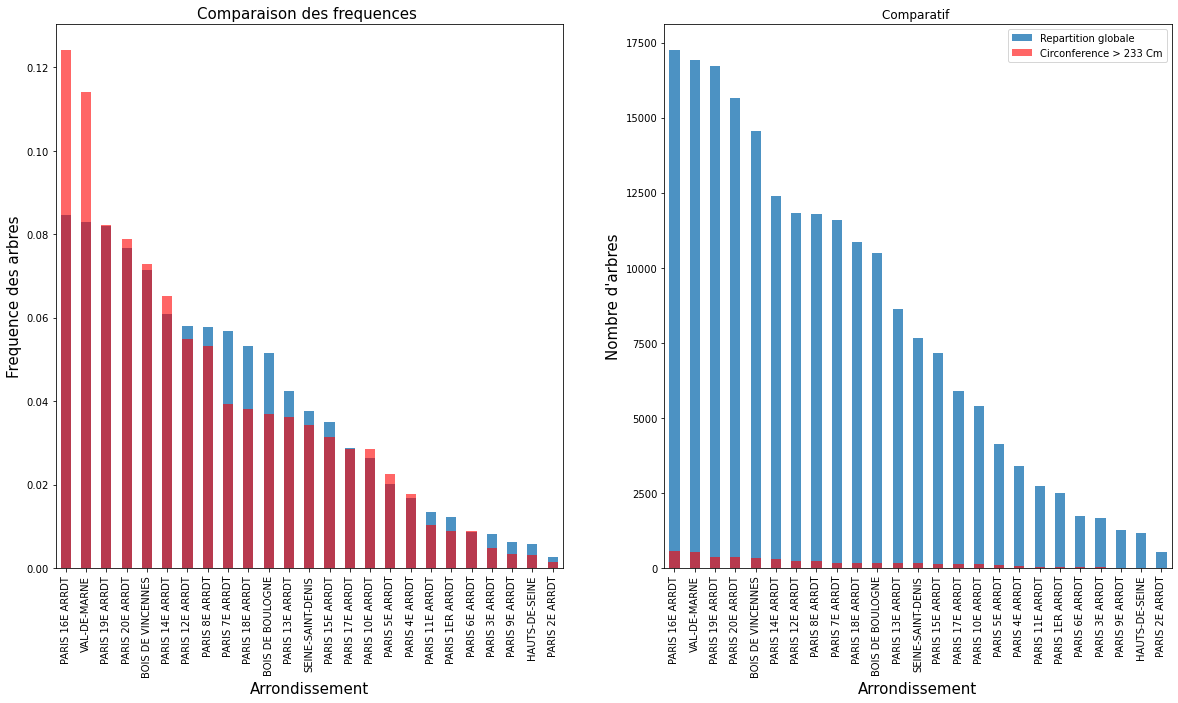

In [42]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
arbres['ARRONDISSEMENT'].value_counts(normalize=True).plot(kind='bar',alpha=0.8, label='Repartition globale')
sub_data['ARRONDISSEMENT'].value_counts(normalize=True).plot(kind='bar' , alpha=0.6, color='red', label='Circonference > 233 Cm')
plt.title('Comparaison des frequences ', size = 15 )
plt.xlabel('Arrondissement',size=15)
plt.ylabel('Frequence des arbres',size=15)
plt.subplot(1,2,2)
arbres['ARRONDISSEMENT'].value_counts(normalize=False).plot(kind='bar',alpha=0.8, label='Repartition globale')
sub_data['ARRONDISSEMENT'].value_counts(normalize=False).plot(kind='bar' , alpha=0.6, color='red', label='Circonference > 233 Cm')
plt.title('Comparatif ')
plt.xlabel('Arrondissement',size=15)
plt.ylabel("Nombre d'arbres",size=15)
plt.legend()
plt.show()

On constate que **les deux repartitions sont plutot différentes dans l'ensemble** mais le point important à signaler est que ces supposés outliers, de circonferences suppérieurs à 233 Cm, **restent tout de même repartis dans tous les arrondissements**; ils restent présent dans tous les Arrondissements avec une repartition qui suit à peu près celle de tous les arbres de nos données.

Celà signifie simplement qu'**ils sont assez représentatifs dans nos données** et donc le statut d'outlier n'est pas necessairement celui qui leur convient le mieux **à moins de définir tout bonnement un outlier comme étant l'ensemble des données situées à plus de 1.5 fois la distance inter-quantile au delà du troisième quantile** et de ne s'en tenir quà cette definition et rien d'autre sans se soucier necessairement de l'importance et de la place de ces sous-données dans notre jeux de données initial.

De mon simple point de vue je pense simplement que le sens qu'on doit donner au mot outlier doit surtout dépendre des objectifs attendus d'une analyse de données :
 - Si par exemple **on s'interesse uniquement aux arbres de faible circonference** alors la definition précédente pourrait suffir amplement
 - Si par contre **on s'interesse aussi aux gros arbres de la ville** alors il serait judicieux de revoir la circonference de coupure qui est de 233 Cm et difinir une circonference de coupure aux alentours de 800 Cm afin d'exclure les 3 arbres que l'on voit la boite à moustache avec une circonference proche de 1200 Cm
 
<font color=red> NB : **La circonference de coupure**</font> est ici la circonference minimale au delà de laquelle un arbres est considéré comme outlier 

Ci-dessous nous représentons la variation des mesures de tendance centrale avec différents rayons de coupure.

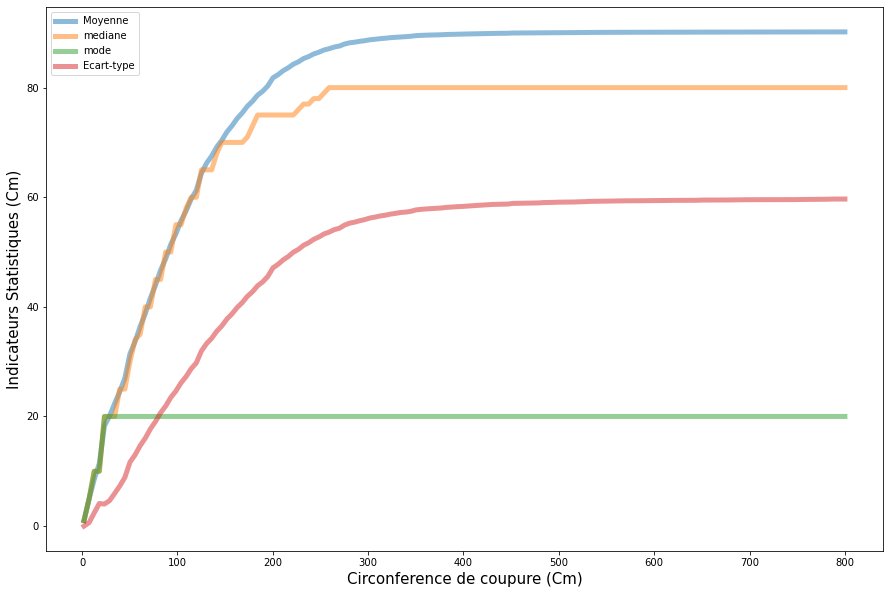

In [43]:
coupure = np.linspace( 2 , 800 , 150)
moy , mod , med , std = [],[],[],[]
for i in coupure :
    tab0 = tab_circonference.loc[ tab_circonference['CIRCONFERENCE (cm)'] < i ]
    moy.append(tab0['CIRCONFERENCE (cm)'].mean())
    std.append(tab0['CIRCONFERENCE (cm)'].std())
    med.append(tab0['CIRCONFERENCE (cm)'].median())
    mod.append(tab0['CIRCONFERENCE (cm)'].mode()[0])
    
plt.figure(figsize =(15,10))
plt.plot(coupure , moy , label='Moyenne',lw=5,alpha=0.5)
plt.plot(coupure , med , label='mediane',lw=5,alpha=0.5)
plt.plot(coupure , mod,label='mode',lw=5,alpha=0.5)
plt.plot(coupure , std,label='Ecart-type',lw=5,alpha=0.5)
plt.xlabel('Circonference de coupure (Cm)',size=15)
plt.ylabel('Indicateurs Statistiques (Cm)',size=15)
plt.legend(loc='best')
plt.show()

On constate que tous les indicateurs deviennent stables à partir d'une circonference de coupure autour de 300 à 400 Cm

**La stabilité recherchée sur les indicateurs statistiques** pourrait être une critère pour définir les outliers de nos données.

En résumé :
- Selon le critère Q3 + 1.5xIQR les outliers ont une circonférence plus grande que **233 Cm**
- Suivant le critère de densité les outliers peuvent être definis à partir d'une circonférence de **580 Cm**
- Selon le criète de stabilité des indicateurs on les definis au delà de **300 Cm**
 
**Les 3 critères conjoints permettent de repérer les outliers à partir d'une circonférence de 580 Cm**

L'histogramme de cette distribution est alors :

In [44]:
cut_data = tab_circonference[tab_circonference['CIRCONFERENCE (cm)' ] < 580]

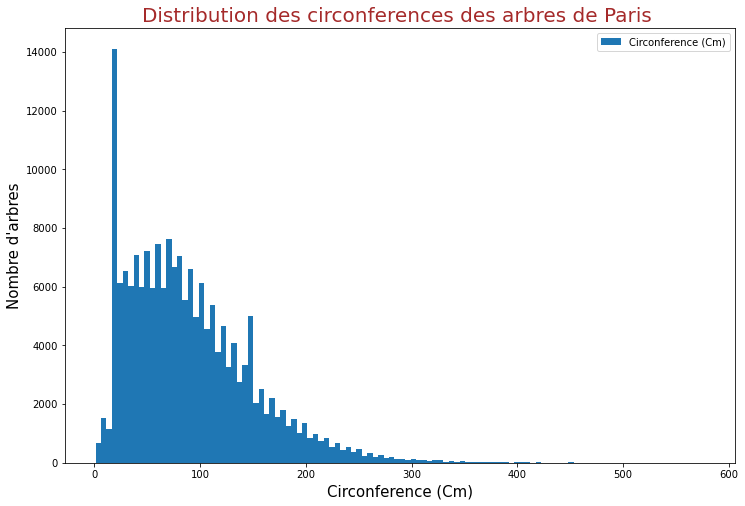

In [45]:
plt.figure(figsize=(12,8))
plt.hist(cut_data, density =False , bins = 112, label='Circonference (Cm)')
plt.title("Distribution des circonferences des arbres de Paris ", color ='brown' , size = 20)
plt.xlabel('Circonference (Cm)' ,size =15)
plt.ylabel("Nombre d'arbres",size =15)
plt.legend(loc='best' )
plt.show()

**Mesures de tendance centrales et de dispersion**

In [46]:
print(f"- Mode : {cut_data['CIRCONFERENCE (cm)' ].mode()[0]} Cm")
print(f"- Moyenne : {int(cut_data['CIRCONFERENCE (cm)' ].mean())} Cm")
print(f"- Ecart-type : {int(cut_data['CIRCONFERENCE (cm)' ].std())} Cm")
print(f"- Médiane : {cut_data['CIRCONFERENCE (cm)' ].median()} Cm")
print(f"- Premier quantile ( Q1 ) : {cut_data['CIRCONFERENCE (cm)' ].quantile(q=0.25)} Cm")
print(f"- Deuxième quantile ( Q3 ) : {cut_data['CIRCONFERENCE (cm)' ].quantile(q=0.75)} Cm")
print(f"- Ecart inter-quantile ( IQR ) : {cut_data['CIRCONFERENCE (cm)' ].quantile(q=0.75)-cut_data['CIRCONFERENCE (cm)' ].quantile(q=0.25)} Cm")


- Mode : 20 Cm
- Moyenne : 90 Cm
- Ecart-type : 59 Cm
- Médiane : 80.0 Cm
- Premier quantile ( Q1 ) : 45.0 Cm
- Deuxième quantile ( Q3 ) : 120.0 Cm
- Ecart inter-quantile ( IQR ) : 75.0 Cm


<div class="alert alert-block alert-info">

> ## <a name="C5"><font color=brown>III . 5 - <u> Sur l'étude de la Hauteur des arbres </u> </font></a>

</div>

Nous avons vu que dans les données **il existaient des arbres avec des hauteur nulles et qu'il y en avait pour 13 % des données**

In [47]:
(arbres['HAUTEUR (m)'] <= 0 ).mean()*100

13.058933124141989

nous allons donc dans la suite **analyser uniquement 87 % des données initiales.**

In [48]:
tab_hauteur = pd.DataFrame( index = arbres[ arbres['HAUTEUR (m)'] > 0 ].index  )
tab_hauteur['HAUTEUR (m)'] =  arbres.loc[ arbres['HAUTEUR (m)'] > 0 , 'HAUTEUR (m)']
tab_hauteur

,HAUTEUR (m)
0,6
1,16
2,5
3,13
5,5
...,...
203954,15
203955,10
203956,9
203958,12


Sur les 203960 arbres de départ il ne nous en reste plus que 177325

**Les hauteur extrêmes étant :**

In [49]:
print(f" Hauteur minimale : {tab_hauteur['HAUTEUR (m)'].min()} m\n Hauteur maximale : {tab_hauteur['HAUTEUR (m)'].max()} m")

 Hauteur minimale : 1 m
 Hauteur maximale : 180 m


La hauteur maximal de 180 m représente environ la hauteur d'un immeuble de 90 étages.

Bien qu'il reste théoriquement possible pour certaines espèces d'arbres assez vieux, puisse atteindre des hauteur comparables il n'en démeure pas moins que ça reste des arbres très rares. **Bien plus [Le plus grand arbre](https://www.topito.com/top-grands-arbres-monde) connu de nos jours s'élève à environ 116 m du sol**; ce qui corrobore de fait la thèse d'un outlier dans les donnés. Il estpossible de définir plusieurs critères graduels pour definir les outliers dans les données; nous les verront plus bas.

A ce niveau, **les différents indicateurs statisques** sont :

In [50]:
print(f"- Mode : {tab_hauteur['HAUTEUR (m)'].mode()[0]} m")
print(f"- Moyenne : {int(tab_hauteur['HAUTEUR (m)'].mean())} m")
print(f"- Ecart-type : {int(tab_hauteur['HAUTEUR (m)'].std())} m")
print(f"- Médiane : {tab_hauteur['HAUTEUR (m)'].median()} m")
print(f"- Premier quantile ( Q1 ) : {tab_hauteur['HAUTEUR (m)'].quantile(q=0.25)} m")
print(f"- Deuxième quantile ( Q3 ) : {tab_hauteur['HAUTEUR (m)'].quantile(q=0.75)} m")
print(f"- Ecart inter-quantile ( IQR ) : {tab_hauteur['HAUTEUR (m)'].quantile(q=0.75)-tab_hauteur['HAUTEUR (m)'].quantile(q=0.25)} m")

- Mode : 5 m
- Moyenne : 10 m
- Ecart-type : 5 m
- Médiane : 10.0 m
- Premier quantile ( Q1 ) : 5.0 m
- Deuxième quantile ( Q3 ) : 14.0 m
- Ecart inter-quantile ( IQR ) : 9.0 m


Ainsi **la hauteur moyenne des arbres est de 10 m** et la moitié de nos arbres ont moins de 10 m de haut et l'autre moitié en a plus. Entre **5 m et 14 m on compte également la moitié** des arbres de la ville alors qu'on rencontre le plus souvent des arbres ayant une hauteur de 5 m.

Sur cette base de quoi on peut definiri les outliers dans nos données comme ayant une hauteur supérieure à **Q3 + 1.5xIQR = 27.5 m.** on peut donc tracer notre boite à moustache :

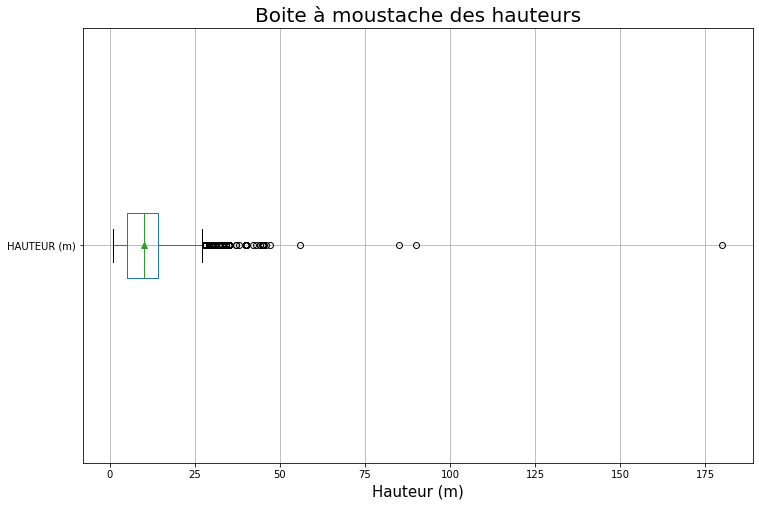

In [51]:
plt.figure(figsize=(12,8))
tab_hauteur.boxplot( column='HAUTEUR (m)', vert =False, showmeans =True,)
plt.xlabel('Hauteur (m)', size =15)
plt.ylabel('')
plt.title('Boite à moustache des hauteurs' , size=20)
plt.show()

Sur une base simple de la densité sur l'axe des hauteurs, on remarque la présence de 4 outliers parfaitements séparés du reste des données; ce qui correspondrait à **une hauteur de coupure d'environ 50 m contre 27.5 sur la base d'un multiple de la distance interquantile.**

On peut tracer la courbe d'évolution des indicateurs statisques avec différentes hauteurs de coupure afin de définir une hauteur de coupure sur la base de la stabilité de ces indicateurs :

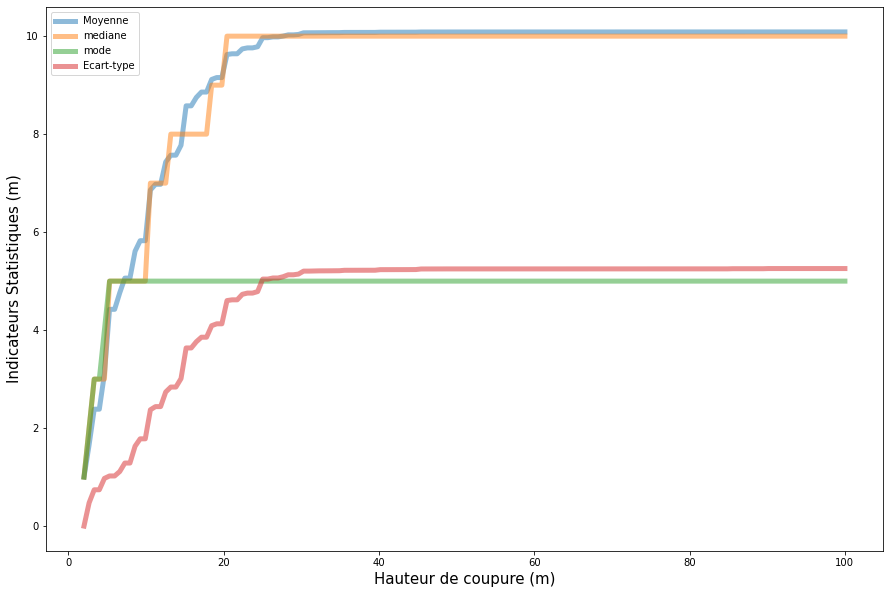

In [52]:
coupure = np.linspace( 2 , 100 , 150)
moy , mod , med , std = [],[],[],[]
for i in coupure :
    tab0 = tab_hauteur[ tab_hauteur['HAUTEUR (m)'] < i ]
    moy.append(tab0['HAUTEUR (m)'].mean())
    std.append(tab0['HAUTEUR (m)'].std())
    med.append(tab0['HAUTEUR (m)'].median())
    mod.append(tab0['HAUTEUR (m)'].mode()[0])
    
plt.figure(figsize =(15,10))
plt.plot(coupure , moy , label='Moyenne',lw=5,alpha=0.5)
plt.plot(coupure , med , label='mediane',lw=5,alpha=0.5)
plt.plot(coupure , mod,label='mode',lw=5,alpha=0.5)
plt.plot(coupure , std,label='Ecart-type',lw=5,alpha=0.5)
plt.xlabel('Hauteur de coupure (m)',size=15)
plt.ylabel('Indicateurs Statistiques (m)',size=15)
plt.legend(loc='best')
plt.show()

On remarque donc qu'**une hauteur de coupure d'environ 40 m est suffisante pour definir les outliers sur la base de la stabilité des indicateurs statistiques** Les 3 critères plus haut définis sont simultanément satisfais pour une hauteur de coupure de 50 m.

L'histogramme des arbres de hauteur plus petite que 50 m est donc :

In [53]:
sub_data = tab_hauteur[ tab_hauteur['HAUTEUR (m)'] < 50 ]

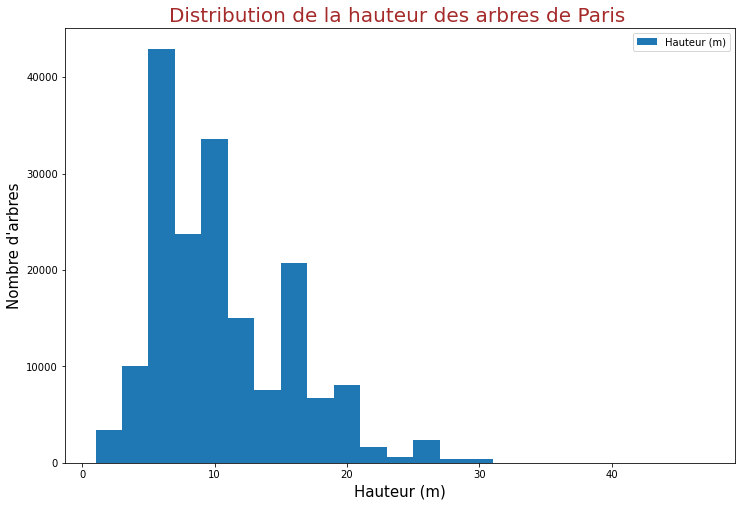

In [54]:
plt.figure(figsize=(12,8))
plt.hist(sub_data['HAUTEUR (m)'] ,density =False , bins = 23, label='Hauteur (m)')
#tab0.hist(density =False , bins = 30, label='Hauteur (m)')
plt.title("Distribution de la hauteur des arbres de Paris ", color ='brown' , size = 20)
plt.xlabel('Hauteur (m)' ,size =15)
plt.ylabel("Nombre d'arbres",size =15)
plt.legend(loc='best' )
plt.show()

**Mesures de tendance centrales et de dispersion**

In [55]:
print(f"- Mode : {sub_data['HAUTEUR (m)'].mode()[0]} m")
print(f"- Moyenne : {int(sub_data['HAUTEUR (m)'].mean())} m")
print(f"- Ecart-type : {int(sub_data['HAUTEUR (m)'].std())} m")
print(f"- Médiane : {sub_data['HAUTEUR (m)'].median()} m")
print(f"- Premier quantile ( Q1 ) : {sub_data['HAUTEUR (m)'].quantile(q=0.25)} m")
print(f"- Deuxième quantile ( Q3 ) : {sub_data['HAUTEUR (m)'].quantile(q=0.75)} m")
print(f"- Ecart inter-quantile ( IQR ) : {sub_data['HAUTEUR (m)'].quantile(q=0.75)-sub_data['HAUTEUR (m)'].quantile(q=0.25)} m")

- Mode : 5 m
- Moyenne : 10 m
- Ecart-type : 5 m
- Médiane : 10.0 m
- Premier quantile ( Q1 ) : 5.0 m
- Deuxième quantile ( Q3 ) : 14.0 m
- Ecart inter-quantile ( IQR ) : 9.0 m
